* Plot de vendas por pais
* plot de vendas por produtos
* plot de  correlação

limpar dados do produto com '?', ou damage, ou crushed

In [102]:
import pandas as pd
import numpy as np

In [103]:
pd.set_option('display.precision',3)

In [104]:
import re

In [105]:
data = pd.read_excel("./DataSet_Test.xlsx")

In [106]:
data

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


explicar operações de tratamento

Primeiro verificamos com a funcionalidade query o nome dos produtos os quais não fazem sentido para nossa análise, após isso vemos

In [107]:
data.query("Itemname == 'missing'")

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
210873,556046,missing,-140,2011-06-08 12:56:00,0.0,NaN,United Kingdom
401710,572701,missing,-840,2011-10-25 14:31:00,0.0,NaN,United Kingdom
517209,581226,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


In [108]:
data.query("Itemname == '??'")

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
324825,566449,??,-140,2011-09-12 16:07:00,0.0,NaN,United Kingdom
327851,566712,??,-635,2011-09-14 12:04:00,0.0,NaN,United Kingdom
367285,569886,??,-60,2011-10-06 15:24:00,0.0,NaN,United Kingdom
375890,570599,??,-365,2011-10-11 12:00:00,0.0,NaN,United Kingdom
401711,572702,??,-184,2011-10-25 14:33:00,0.0,NaN,United Kingdom
402417,572749,??,-335,2011-10-25 16:52:00,0.0,NaN,United Kingdom
438136,575615,??,-130,2011-11-10 12:51:00,0.0,NaN,United Kingdom


In [109]:
data.query("Itemname == 'crushed'")

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
164637,551327,crushed,-4,2011-04-27 16:01:00,0.0,NaN,United Kingdom
311754,565371,crushed,-13,2011-09-02 15:04:00,0.0,NaN,United Kingdom


In [110]:
data.query("Itemname == 'DAMAGED'")

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
151016,550153,DAMAGED,-1,2011-04-14 14:44:00,0.0,NaN,United Kingdom


In [111]:
data.query("Itemname == 'damaged'")

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
149090,549935,damaged,-43,2011-04-13 11:16:00,0.0,NaN,United Kingdom
149231,549948,damaged,-1,2011-04-13 12:55:00,0.0,NaN,United Kingdom
161003,550954,damaged,-2,2011-04-21 16:18:00,0.0,NaN,United Kingdom
164581,551302,damaged,-18,2011-04-27 14:55:00,0.0,NaN,United Kingdom
174394,552331,damaged,-30,2011-05-09 10:24:00,0.0,NaN,United Kingdom
182882,553147,damaged,-160,2011-05-13 13:58:00,0.0,NaN,United Kingdom
193394,554128,damaged,-4,2011-05-23 09:26:00,0.0,NaN,United Kingdom
195422,554432,damaged,-97,2011-05-24 12:16:00,0.0,NaN,United Kingdom
205319,555503,damaged,-1,2011-06-03 15:39:00,0.0,NaN,United Kingdom
205322,555506,damaged,-57,2011-06-03 16:03:00,0.0,NaN,United Kingdom


In [112]:
data.shape[0]

522064

In [113]:
data.Itemname.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2269
JUMBO BAG RED RETROSPOT                2087
REGENCY CAKESTAND 3 TIER               1930
PARTY BUNTING                          1677
LUNCH BAG RED RETROSPOT                1570
                                       ... 
FOOD COVER WITH BEADS , SET 2 SIZES       1
POLYESTER FILLER PAD 60x40cm              1
damages/credits from ASOS.                1
samples                                   1
PAPER CRAFT , LITTLE BIRDIE               1
Name: Itemname, Length: 4185, dtype: int64

## Início do tratamento

nomes do itemname que precisam ser retirados

wrongly sold sets
wrongly sold as sets
wrongly sold (22719) barcode
wrongly marked. 23343 in box
wrongly marked carton 22804
wrongly marked 23343
wrongly marked
wrongly coded-23343
wrongly coded 23343
wrongly coded 20713
wrong code?
wrong code
wrong barcode (22467)
wrong barcode
wet?
wet/rusty
wet rusty
wet pallet
wet damaged
wet boxes
wet
website fixed
water damaged
water damage
to push order througha s stock was
thrown away-can't sell.
thrown away-can't sell
thrown away
throw away
test
temp adjustment
taig adjust no stock
taig adjust
stock creditted wrongly
stock check
sold with wrong barcode
sold in set?
sold as set/6 by dotcom
sold as set on dotcom and amazon
sold as set on dotcom
sold as set by dotcom
sold as 22467
sold as 1
smashed
showroom
samples/damages
samples
rusty thrown away
rusty throw away
reverse previous adjustment
reverse 21/5/10 adjustment
returned
re-adjustment
re dotcom quick fix.
rcvd be air temp fix for dotcom sit
printing smudges/thrown away
on cargo order
mystery! Only ever imported 1800
mouldy, unsaleable.
mouldy, thrown away.
mouldy
mixed up
mix up with c
missing?
missing
michel oops
mailout
lost??
lost in space
lost
label mix up
incorrectly put back into stock
incorrectly made-thrown away.
incorrectly credited C550456 see 47
incorrect stock entry.
historic computer difference?....se
had been put aside
found some more on shelf
found box
found
for online retail orders
faulty
ebay
dotcomstock
dotcom sold sets
dotcom sales
dotcom adjust
dotcom
did  a credit  and did not tick ret
damages?
damages/showroom etc
damages/dotcom?
damages/display
damages/credits from ASOS.
damages wax
damages
damaged stock
damaged
crushed ctn
crushed boxes
crushed
cracked
counted
code mix up? 84930
check?
check
can't find
came coded as 20713
broken
barcode problem
amazon sales
amazon adjust
amazon
allocate stock for dotcom orders ta
alan hodge cant mamage this section
adjustment
adjust
add stock to allocate online orders

In [114]:
df = data.copy()

In [115]:
names_to_drop = [
    " wrongly sold sets",
    "wrongly sold as sets",
    "wrongly sold(22719) barcode",
    "wrongly marked. 23343 in box",
    "wrongly marked carton 22804",
    "wrongly marked 23343",
    "wrongly marked",
    "wrongly coded - 23343",
    "wrongly coded 23343",
    "wrongly coded 20713",
    "wrong code?",
    "wrong code",
    "wrong barcode (22467)",
    "wrong barcode",
    "wet?",
    "wet / rusty",
    "wet rusty",
    "wet pallet",
    "wet damaged",
    "wet boxes",
    "wet",
    "website fixed",
    "water damaged",
    "water damage",
    "to push order througha s stock was",
    "thrown away-can't sell.",
    "thrown away-can't sell",
    "thrown away",
    "throw away",
    "test",
    "temp adjustment",
    "taig adjust no stock",
    "taig adjust",
    "stock creditted wrongly",
    "stock check",
    "sold with wrong barcode",
    "sold in set?",
    "sold as set / 6 by dotcom",
    "sold as set on dotcom and amazon",
    "sold as set on dotcom",
    "sold as set by dotcom",
    "sold as 22467",
    "sold as 1",
    "smashed",
    "showroom",
    "samples / damages",
    "samples",
    "rusty thrown away",
    "rusty throw away",
    "reverse previous adjustment",
    "reverse 21 / 5 / 10 adjustment",
    "returned",
    "re-adjustment",
    "re dotcom quick fix.",
    "rcvd be air temp fix for dotcom sit",
    "printing smudges / thrown away",
    "on cargo order",
    "mystery! Only ever imported 1800",
    "mouldy, unsaleable.",
    "mouldy, thrown away.",
    "mouldy",
    "mixed up",
    "mix up with c",
    "missing?",
    "missing",
    "michel oops",
    "mailout",
    "lost??",
    "lost in space",
    "lost",
    "label mix up",
    "incorrectly put back into stock",
    "incorrectly made-thrown away.",
    "incorrectly credited C550456 see 47",
    "incorrect stock entry.",
    "historic computer difference?....se",
    "had been put aside",
    "found some more on shelf",
    "found box",
    "found",
    "for online retail orders",
    "faulty",
    "ebay",
    "dotcomstock",
    "dotcom sold sets",
    "dotcom sales",
    "dotcom adjust",
    "dotcom",
    "did  a credit and did not tick ret",
    "damages?",
    "damages / showroom etc",
    "damages / dotcom?",
    "damages / display",
    "damages / credits from ASOS.",
    "damages wax",
    "damages",
    "damaged stock",
    "damaged",
    "crushed ctn",
    "crushed boxes",
    "crushed",
    "cracked",
    "counted",
    "code mix up? 84930",
    "check?",
    "check",
    "can't find",
    "came coded as 20713",
    "broken",
    "barcode problem",
    "amazon sales",
    "amazon adjust",
    "amazon",
    "allocate stock for dotcom orders ta",
    "alan hodge cant mamage this section",
    "adjustment",
    "adjust",
    "add stock to allocate online orders",
    "??",
    "?",
    "damages",
    "damaged"
]

In [116]:
names_to_drop

[' wrongly sold sets',
 'wrongly sold as sets',
 'wrongly sold(22719) barcode',
 'wrongly marked. 23343 in box',
 'wrongly marked carton 22804',
 'wrongly marked 23343',
 'wrongly marked',
 'wrongly coded - 23343',
 'wrongly coded 23343',
 'wrongly coded 20713',
 'wrong code?',
 'wrong code',
 'wrong barcode (22467)',
 'wrong barcode',
 'wet?',
 'wet / rusty',
 'wet rusty',
 'wet pallet',
 'wet damaged',
 'wet boxes',
 'wet',
 'website fixed',
 'water damaged',
 'water damage',
 'to push order througha s stock was',
 "thrown away-can't sell.",
 "thrown away-can't sell",
 'thrown away',
 'throw away',
 'test',
 'temp adjustment',
 'taig adjust no stock',
 'taig adjust',
 'stock creditted wrongly',
 'stock check',
 'sold with wrong barcode',
 'sold in set?',
 'sold as set / 6 by dotcom',
 'sold as set on dotcom and amazon',
 'sold as set on dotcom',
 'sold as set by dotcom',
 'sold as 22467',
 'sold as 1',
 'smashed',
 'showroom',
 'samples / damages',
 'samples',
 'rusty thrown away',
 

In [117]:
df.Itemname = df.Itemname.str.lower()

In [118]:
df.drop(df[df.Itemname.isin(names_to_drop) ].index,inplace=True)

In [119]:
df.shape

(521496, 7)

In [120]:
df.reset_index(inplace=True)
df.drop(columns=["index"])

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
521491,581587,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France
521492,581587,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France
521493,581587,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France
521494,581587,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France


Iremos tirar também colunas que não fazem sentido nas nossas análises

sendo elas CustomerID,BillNo

In [121]:
df.drop(columns=["BillNo","CustomerID"], inplace=True)

In [122]:
df.columns

Index(['index', 'Itemname', 'Quantity', 'Date', 'Price', 'Country'], dtype='object')

In [123]:
df.head(10)

,index,Itemname,Quantity,Date,Price,Country
0,0,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,United Kingdom
1,1,white metal lantern,6,2010-12-01 08:26:00,3.39,United Kingdom
2,2,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,United Kingdom
3,3,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,United Kingdom
4,4,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,United Kingdom
5,5,set 7 babushka nesting boxes,2,2010-12-01 08:26:00,7.65,United Kingdom
6,6,glass star frosted t-light holder,6,2010-12-01 08:26:00,4.25,United Kingdom
7,7,hand warmer union jack,6,2010-12-01 08:28:00,1.85,United Kingdom
8,8,hand warmer red polka dot,6,2010-12-01 08:28:00,1.85,United Kingdom
9,9,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,United Kingdom


In [124]:
df["Price_Total"] = df["Quantity"] * df["Price"]

In [125]:
df.head(10)

,index,Itemname,Quantity,Date,Price,Country,Price_Total
0,0,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,1,white metal lantern,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,2,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,3,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,4,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
5,5,set 7 babushka nesting boxes,2,2010-12-01 08:26:00,7.65,United Kingdom,15.30
6,6,glass star frosted t-light holder,6,2010-12-01 08:26:00,4.25,United Kingdom,25.50
7,7,hand warmer union jack,6,2010-12-01 08:28:00,1.85,United Kingdom,11.10
8,8,hand warmer red polka dot,6,2010-12-01 08:28:00,1.85,United Kingdom,11.10
9,9,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,United Kingdom,54.08


In [126]:
df.query("Itemname=='??'")

,index,Itemname,Quantity,Date,Price,Country,Price_Total


## Perguntas e Vizualizações

In [127]:
df_country_group = df.groupby(by="Country", as_index=False,sort=True).agg({"Quantity":"mean","Price_Total":"mean"})

In [128]:
df_country_group.sort_values(by="Quantity",ascending=False,inplace=True)

In [129]:
df_country_group.reset_index(inplace=True)
df_country_group.drop(columns=["index"],inplace=True)

In [130]:
df_country_group

,Country,Quantity,Price_Total
0,Netherlands,85.035,120.798
1,Japan,81.047,116.562
2,Sweden,80.007,85.096
3,Australia,71.062,116.896
4,Singapore,23.608,95.853
5,Lithuania,18.629,47.459
6,Norway,18.039,33.736
7,Bahrain,17.444,41.897
8,Hong Kong,16.806,55.253
9,Switzerland,15.572,29.024


In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
df_country_group.index

RangeIndex(start=0, stop=30, step=1)

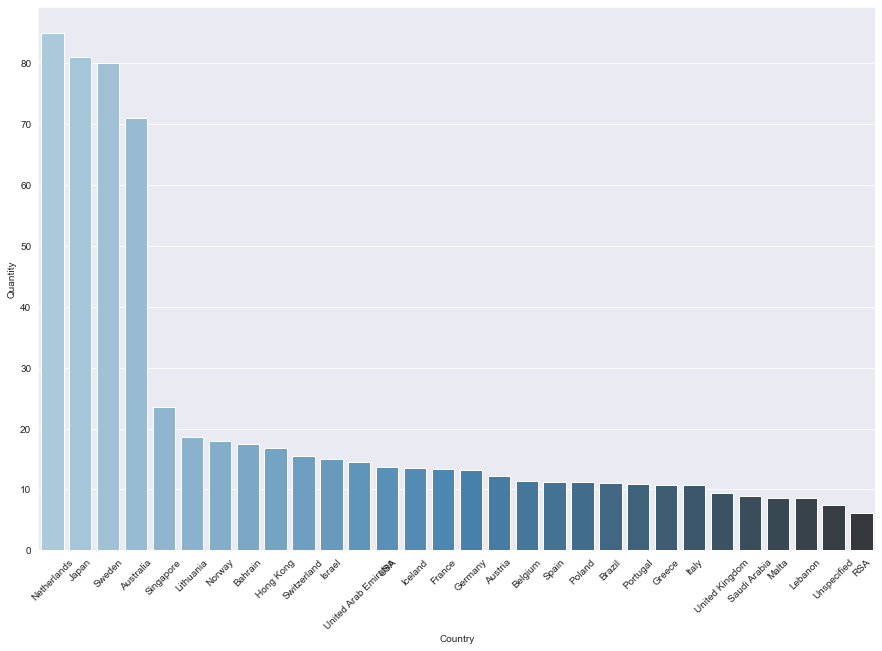

In [133]:
fig = plt.figure(figsize=(15,10))
ax = sns.barplot(x="Country", y="Quantity", data=df_country_group,
                 palette="Blues_d")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.ylabel("Quantity")
plt.show()

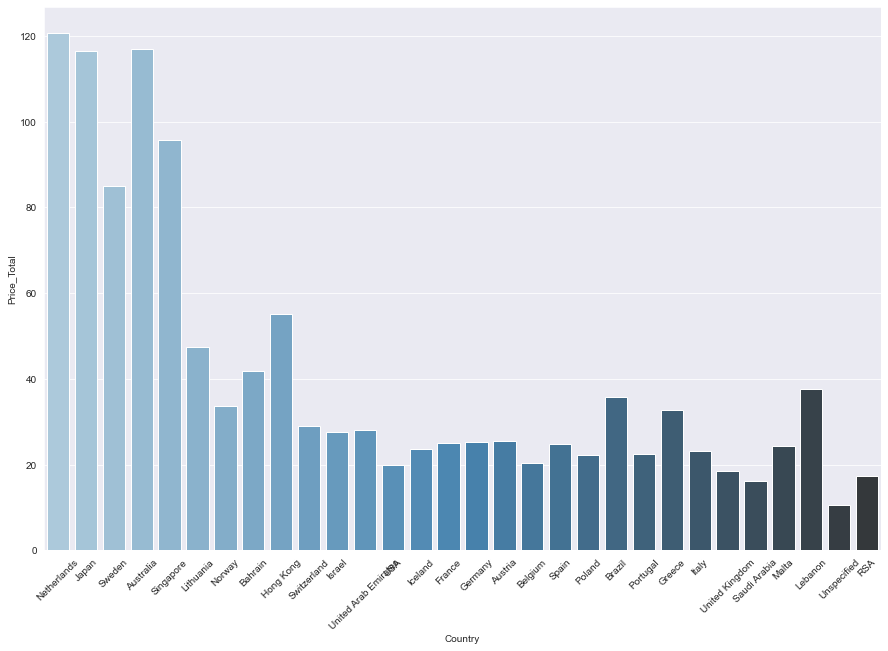

In [134]:
fig = plt.figure(figsize=(15,10))
ax = sns.barplot(x="Country", y="Price_Total", data=df_country_group,
                 palette="Blues_d")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.ylabel("Price_Total")
plt.show()

Plotando a quantiade pela data

In [135]:
df.dropna(inplace=True)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520041 entries, 0 to 521495
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   index        520041 non-null  int64         
 1   Itemname     520041 non-null  object        
 2   Quantity     520041 non-null  int64         
 3   Date         520041 non-null  datetime64[ns]
 4   Price        520041 non-null  float64       
 5   Country      520041 non-null  object        
 6   Price_Total  520041 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 31.7+ MB


In [137]:
df.Date = df.Date.dt.date

In [138]:
df_data_group = df.groupby(by="Date",sort=True).agg({"Quantity":"mean","Price_Total":"mean"})

In [139]:
df_data_group

,Quantity,Price_Total
Date,,
2010-12-01,8.743,19.143
2010-12-02,15.191,23.145
2010-12-03,6.582,21.433
2010-12-05,6.073,11.729
2010-12-06,5.603,14.193
...,...,...
2011-12-05,8.307,16.674
2011-12-06,9.340,17.386
2011-12-07,17.765,32.172


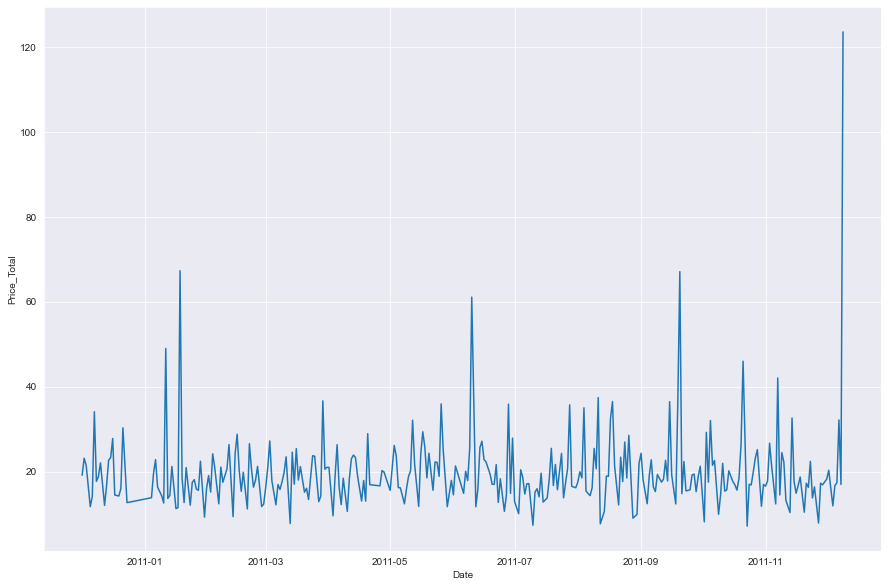

In [140]:
fig = plt.figure(figsize=(15,10))
ax = sns.lineplot(data=df_data_group, x=df_data_group.index, y="Price_Total")

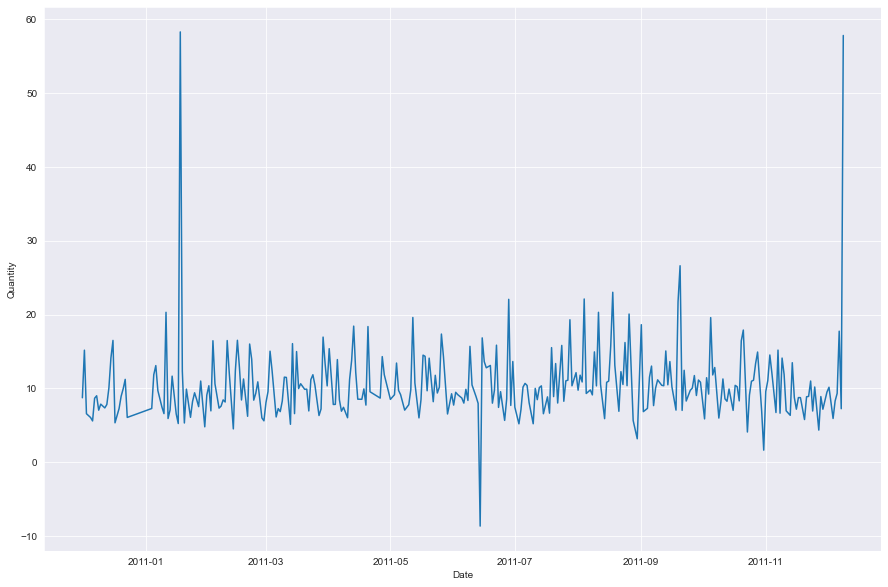

In [141]:
fig = plt.figure(figsize=(15,10))
ax = sns.lineplot(data=df_data_group, x=df_data_group.index, y="Quantity")

Não conseguimos detectar uma tendencia na serie temporal devido aos inumeros ruidos, faremos isso em outro notebook dedicado a modelagem.

## Algumas das perguntas que podemos fazer é qual o produto mais comprado?

In [142]:
cont_produtos = df.Itemname.value_counts( ascending=False)

In [143]:
cont_produtos

white hanging heart t-light holder    2269
jumbo bag red retrospot               2087
regency cakestand 3 tier              1930
party bunting                         1677
lunch bag red retrospot               1570
                                      ... 
marie antoienett trinket box gold        1
wrongly coded-23343                      1
wall art,only one person                 1
orange/fuschia stones necklace           1
paper craft , little birdie              1
Name: Itemname, Length: 4063, dtype: int64

Podemos ver que o produto mais comprado seria "WHITE HANGING HEART T-LIGHT HOLDER" com 2269 compras

## Produto com vendido com a maior quantiadade de itens

In [144]:
df

,index,Itemname,Quantity,Date,Price,Country,Price_Total
0,0,white hanging heart t-light holder,6,2010-12-01,2.55,United Kingdom,15.30
1,1,white metal lantern,6,2010-12-01,3.39,United Kingdom,20.34
2,2,cream cupid hearts coat hanger,8,2010-12-01,2.75,United Kingdom,22.00
3,3,knitted union flag hot water bottle,6,2010-12-01,3.39,United Kingdom,20.34
4,4,red woolly hottie white heart.,6,2010-12-01,3.39,United Kingdom,20.34
...,...,...,...,...,...,...,...
521491,522059,pack of 20 spaceboy napkins,12,2011-12-09,0.85,France,10.20
521492,522060,children's apron dolly girl,6,2011-12-09,2.10,France,12.60
521493,522061,childrens cutlery dolly girl,4,2011-12-09,4.15,France,16.60
521494,522062,childrens cutlery circus parade,4,2011-12-09,4.15,France,16.60


In [145]:
df.query("Quantity>10000")

,index,Itemname,Quantity,Date,Price,Country,Price_Total
59975,59999,medium ceramic top storage jar,74215,2011-01-18,1.04,United Kingdom,77183.6
482854,483371,asstd design 3d paper stickers,12540,2011-11-25,0.00,United Kingdom,0.0
520015,520583,"paper craft , little birdie",80995,2011-12-09,2.08,United Kingdom,168469.6


Vemos que dos 3 produtos apresentados 1 não tem preço podendo assim ser um eventual erro de preenchimento da planilha.

vamos procurar por design 3d paper stickers para indentificar se existe outro produto igual

In [146]:
df.query("Itemname=='asstd design 3d paper stickers'")

,index,Itemname,Quantity,Date,Price,Country,Price_Total
3275,3275,asstd design 3d paper stickers,60,2010-12-02,0.85,United Kingdom,51.00
28768,28780,asstd design 3d paper stickers,60,2010-12-14,0.21,United Kingdom,12.60
29683,29695,asstd design 3d paper stickers,60,2010-12-14,0.21,United Kingdom,12.60
30239,30252,asstd design 3d paper stickers,60,2010-12-15,0.21,United Kingdom,12.60
31108,31121,asstd design 3d paper stickers,60,2010-12-15,0.21,United Kingdom,12.60
31371,31384,asstd design 3d paper stickers,2,2010-12-15,0.85,France,1.70
36552,36565,asstd design 3d paper stickers,1,2010-12-19,0.85,United Kingdom,0.85
36554,36567,asstd design 3d paper stickers,1,2010-12-19,0.85,United Kingdom,0.85
36560,36573,asstd design 3d paper stickers,2,2010-12-19,0.85,United Kingdom,1.70
40020,40035,asstd design 3d paper stickers,60,2010-12-22,0.21,United Kingdom,12.60


por medida de segurança vou checar outros 2 produtos

In [147]:
df.query("Itemname=='medium ceramic top storage jar'")

,index,Itemname,Quantity,Date,Price,Country,Price_Total
59975,59999,medium ceramic top storage jar,74215,2011-01-18,1.04,United Kingdom,77183.60
180284,180388,medium ceramic top storage jar,96,2011-05-12,1.04,Netherlands,99.84
180706,180810,medium ceramic top storage jar,4,2011-05-12,1.25,United Kingdom,5.00
181227,181331,medium ceramic top storage jar,5,2011-05-12,1.25,United Kingdom,6.25
181377,181481,medium ceramic top storage jar,3,2011-05-12,1.25,United Kingdom,3.75
...,...,...,...,...,...,...,...
513513,514066,medium ceramic top storage jar,2,2011-12-07,1.25,United Kingdom,2.50
515983,516549,medium ceramic top storage jar,1,2011-12-08,2.46,United Kingdom,2.46
519389,519957,medium ceramic top storage jar,2,2011-12-08,2.46,United Kingdom,4.92
519895,520463,medium ceramic top storage jar,48,2011-12-09,1.04,Norway,49.92


In [148]:
df.query("Itemname=='paper craft , little birdie'")

,index,Itemname,Quantity,Date,Price,Country,Price_Total
520015,520583,"paper craft , little birdie",80995,2011-12-09,2.08,United Kingdom,168469.6


In [149]:
df.tail(10)

,index,Itemname,Quantity,Date,Price,Country,Price_Total
521486,522054,alarm clock bakelike green,4,2011-12-09,3.75,France,15.00
521487,522055,alarm clock bakelike ivory,4,2011-12-09,3.75,France,15.00
521488,522056,childrens apron spaceboy design,8,2011-12-09,1.95,France,15.60
521489,522057,spaceboy lunch box,12,2011-12-09,1.95,France,23.40
521490,522058,childrens cutlery spaceboy,4,2011-12-09,4.15,France,16.60
521491,522059,pack of 20 spaceboy napkins,12,2011-12-09,0.85,France,10.20
521492,522060,children's apron dolly girl,6,2011-12-09,2.10,France,12.60
521493,522061,childrens cutlery dolly girl,4,2011-12-09,4.15,France,16.60
521494,522062,childrens cutlery circus parade,4,2011-12-09,4.15,France,16.60
521495,522063,baking set 9 piece retrospot,3,2011-12-09,4.95,France,14.85


In [150]:
df

,index,Itemname,Quantity,Date,Price,Country,Price_Total
0,0,white hanging heart t-light holder,6,2010-12-01,2.55,United Kingdom,15.30
1,1,white metal lantern,6,2010-12-01,3.39,United Kingdom,20.34
2,2,cream cupid hearts coat hanger,8,2010-12-01,2.75,United Kingdom,22.00
3,3,knitted union flag hot water bottle,6,2010-12-01,3.39,United Kingdom,20.34
4,4,red woolly hottie white heart.,6,2010-12-01,3.39,United Kingdom,20.34
...,...,...,...,...,...,...,...
521491,522059,pack of 20 spaceboy napkins,12,2011-12-09,0.85,France,10.20
521492,522060,children's apron dolly girl,6,2011-12-09,2.10,France,12.60
521493,522061,childrens cutlery dolly girl,4,2011-12-09,4.15,France,16.60
521494,522062,childrens cutlery circus parade,4,2011-12-09,4.15,France,16.60


In [151]:
df.query("Itemname=='asstd design 3d paper stickers'")

,index,Itemname,Quantity,Date,Price,Country,Price_Total
3275,3275,asstd design 3d paper stickers,60,2010-12-02,0.85,United Kingdom,51.00
28768,28780,asstd design 3d paper stickers,60,2010-12-14,0.21,United Kingdom,12.60
29683,29695,asstd design 3d paper stickers,60,2010-12-14,0.21,United Kingdom,12.60
30239,30252,asstd design 3d paper stickers,60,2010-12-15,0.21,United Kingdom,12.60
31108,31121,asstd design 3d paper stickers,60,2010-12-15,0.21,United Kingdom,12.60
31371,31384,asstd design 3d paper stickers,2,2010-12-15,0.85,France,1.70
36552,36565,asstd design 3d paper stickers,1,2010-12-19,0.85,United Kingdom,0.85
36554,36567,asstd design 3d paper stickers,1,2010-12-19,0.85,United Kingdom,0.85
36560,36573,asstd design 3d paper stickers,2,2010-12-19,0.85,United Kingdom,1.70
40020,40035,asstd design 3d paper stickers,60,2010-12-22,0.21,United Kingdom,12.60


aqui vemos um possivel erro onde mostra que apenas 1 desse produto tem essa quantidade enorme de unidades na venda e não possui preço

C:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


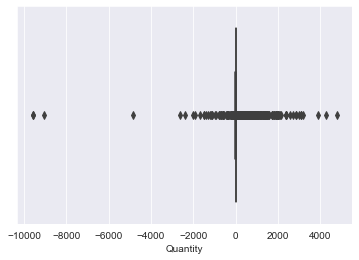

In [163]:
sns.boxplot(df.Quantity);

In [153]:
df.describe()

,index,Quantity,Price,Price_Total
count,520041.000,520041.000,520041.000,520041.000
mean,261120.764,10.297,3.842,19.767
std,150742.004,159.944,41.981,273.597
min,0.000,-9600.000,-11062.060,-11062.060
25%,130477.000,1.000,1.250,3.750
50%,261196.000,3.000,2.080,9.840
75%,391674.000,10.000,4.130,17.400
max,522063.000,80995.000,13541.330,168469.600


medidas de tratamento:
* podemos remover todas as 3 linhas
* remover apenas as 2 linhas erradas que seriam *asstd design 3d paper stickers* id= 483371 e *medium ceramic top storage jar* id = 74215

Para uma análise mais precisa optei por remover todas as 3 linhas

In [164]:
df.query("Quantity<0")

,Itemname,Quantity,Date,Price,Country,Price_Total
41171,reverse 21/5/10 adjustment,-100,2011-01-04,0.0,United Kingdom,-0.0
41172,reverse 21/5/10 adjustment,-100,2011-01-04,0.0,United Kingdom,-0.0
63189,given away,-1400,2011-01-20,0.0,United Kingdom,-0.0
71372,samples/damages,-20,2011-01-27,0.0,United Kingdom,-0.0
107909,mia,-154,2011-03-07,0.0,United Kingdom,-0.0
110347,dotcom set,-675,2011-03-08,0.0,United Kingdom,-0.0
110387,amazon sold sets,-210,2011-03-08,0.0,United Kingdom,-0.0
110388,wrongly sold sets,-975,2011-03-08,0.0,United Kingdom,-0.0
110389,? sold as sets?,-1200,2011-03-08,0.0,United Kingdom,-0.0
110390,?sold as sets?,-600,2011-03-08,0.0,United Kingdom,-0.0


In [162]:
df.sort_values(by="Quantity",ascending=False)

,Itemname,Quantity,Date,Price,Country,Price_Total
403441,world war 2 gliders asstd designs,4800,2011-10-27,0.21,United Kingdom,1008.00
197983,small popcorn holder,4300,2011-05-27,0.72,United Kingdom,3096.00
93913,empire design rosette,3906,2011-02-22,0.82,United Kingdom,3202.92
259753,essential balm 3.5g tin in envelope,3186,2011-07-19,0.06,United Kingdom,191.16
51047,fairy cake flannel assorted colour,3114,2011-01-11,2.10,United Kingdom,6539.40
...,...,...,...,...,...,...
413004,"unsaleable, destroyed.",-2618,2011-10-31,0.00,United Kingdom,-0.00
413007,"unsaleable, destroyed.",-4830,2011-10-31,0.00,United Kingdom,-0.00
216640,printing smudges/thrown away,-9058,2011-06-14,0.00,United Kingdom,-0.00
216642,printing smudges/thrown away,-9600,2011-06-14,0.00,United Kingdom,-0.00


In [161]:
df.drop(df.index[[59814,518560,481421]], inplace=True)

# Remover dados Negativos, Salvar o df apos isso e refazer a modelagem